In [6]:
!pip install gymnasium gym_bandits

In [7]:
import gymnasium as gym
import gym_bandits
import numpy as np

In [4]:
print(env.observation_space)

Discrete(1)


Estimated Q-values for each arm: [-0.06  0.11 -0.32  0.04  0.11 -0.26 -0.2   0.23 -0.75 -0.  ]
Number of times each arm was selected: [ 29 348  20  39  13   7   3  28   5   8]
Average reward over all episodes: 0.064


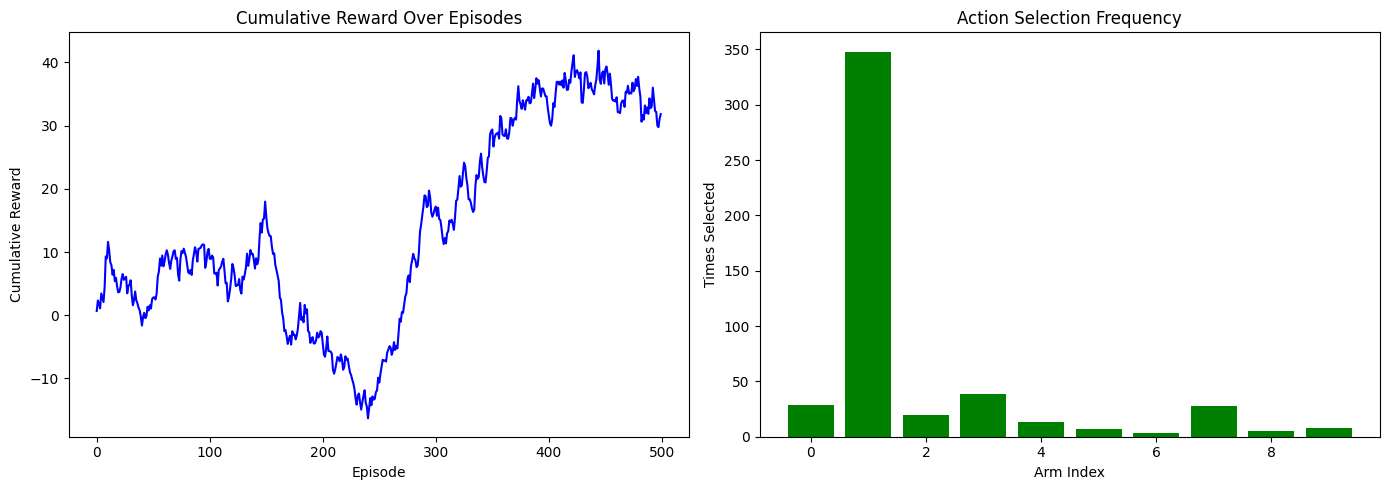

In [11]:
import warnings
import matplotlib.pyplot as plt

n_arms = env.action_space.n
num_episodes = 500
epsilon = 0.1

q_values = np.zeros(n_arms)
counts = np.zeros(n_arms)
reward_sums = np.zeros(n_arms)

all_rewards = []
action_history = []

warnings.filterwarnings("ignore", category=DeprecationWarning)

for episode in range(num_episodes):
    # The reset method in gym_bandits returns only the observation (an integer)
    observation = env.reset()
    info = {} # Provide an empty dictionary for info to match Gymnasium API

    if np.random.rand() < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(q_values)

    # gym_bandits step method returns observation, reward, done, info (4 values)
    observation, reward, done, info = env.step(action)

    # Adapt to Gymnasium API (observation, reward, terminated, truncated, info)
    terminated = done
    truncated = False # Assuming bandits environments don't terminate due to truncation

    counts[action] += 1
    reward_sums[action] += reward

    q_values[action] = reward_sums[action] / counts[action] if counts[action] > 0 else 0


    all_rewards.append(reward)
    action_history.append(action)

env.close()
print("Estimated Q-values for each arm:", np.round(q_values, 2))
print("Number of times each arm was selected:", counts.astype(int))
print("Average reward over all episodes:", round(np.mean(all_rewards), 3))
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(np.cumsum(all_rewards), color='blue')
plt.title("Cumulative Reward Over Episodes")
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")

plt.subplot(1, 2, 2)
plt.bar(np.arange(n_arms), counts, color='green')
plt.title("Action Selection Frequency")
plt.xlabel("Arm Index")
plt.ylabel("Times Selected")

plt.tight_layout()
plt.show()